<a href="https://colab.research.google.com/github/Ayoubkassi/Twitter_Comercial_Segments/blob/main/Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [207]:
# !pip install pycountry-convert

# I- Installing libraries 

In [208]:
from nltk.corpus import stopwords
import nltk
import re
from wordcloud import WordCloud

import pycountry_convert as pc


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from collections import Counter



# II- Importing the datasets

In [209]:
Tweets_data = pd.read_csv('i_want_an_iphone_after_+10500.csv')
Users_data = pd.read_csv('i_want_an_iphone_after_+10500_users_with_gender.csv')

# Creating a copy of the users data to use for the second approach of our continent detection algorithm
Users_data2 = Users_data.copy()

### II-1 looking to our datasets

In [210]:
Tweets_data.head()

,Username,Name,PostDate,TweetText,ReplyCount,RetweetCount,LikeCount,Views
0,@andrechemist,Andre the Chemist,27 Feb 2023,I just remembered when I went to buy an iPhon...,5,9,106,11.7K
1,@UnicornPimpcess,Shaylee,28 Feb 2023,I want my childhood and an iPhone nano back,NaN,NaN,NaN,NaN
2,@iwantaniphonexs,iPhone XS ,27 Feb 2023,I want an iPhone XS.,NaN,NaN,NaN,NaN
3,@CabbitBrat,Cabbit ENVtuber,27 Feb 2023,It's like as much as I want an IPhone for m...,NaN,NaN,NaN,NaN
4,@Farahlived,Farah Gabrielle,27 Feb 2023,I want an iPhone with BBM and a Nokia batte...,NaN,NaN,NaN,NaN


In [211]:
Users_data.head()

,type,dateCreated,username,givenName,description,location,follows,friends,tweets,gender
0,ProfilePage,2017-09-17T00:21:27.000Z,spinachlsgna,biskita enthusiast,passionate about cars and destroying them for ...,NaN,29,404,1343,uknown
1,ProfilePage,2017-04-18T16:29:55.000Z,desifactsbot,Desifacts,Biryani,NaN,3,0,3769,uknown
2,ProfilePage,2008-09-24T21:15:31.000Z,romyilano,romy@mastodon.berlin,I like to build things,"Oakland, CA",1963,3357,100203,uknown
3,ProfilePage,2017-05-11T19:54:45.000Z,TierraHenson,🐼 Pandamonium,"Pro-CommonSense, Gamer, Otaku Nerd and Artist....",NaN,920,1571,48769,uknown
4,ProfilePage,2017-12-02T10:56:56.000Z,correctBlogger,Your Favorite Online Tech Blogger..,Creative tech story teller and blogger @ https...,Places,829,754,8612,uknown


## II-2 NA check

In [212]:
tweet = Tweets_data['TweetText']
tweet.isnull().sum()

12

## II-3 Tokenization and removing the stopping words

### II-3-1 Uploading NLTK

In [213]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/amine/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/amine/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### II-3-2 TOkenization and stopping words removal 

In [214]:
comments = []
stop_words = set(stopwords.words('english'))

for words in tweet:
    only_letters = re.sub("[^a-zA-Z]", " ",str(words))
    tokens = nltk.word_tokenize(only_letters) #tokenize the sentences
    lower_case = [l.lower() for l in tokens] #convert all letters to lower case
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case)) #Remove stopwords from the comments
    comments.append(' '.join(filtered_result))
  


### II-3-3 Joining and getting the wordcloud

In [215]:
unique_string=(" ").join(comments)

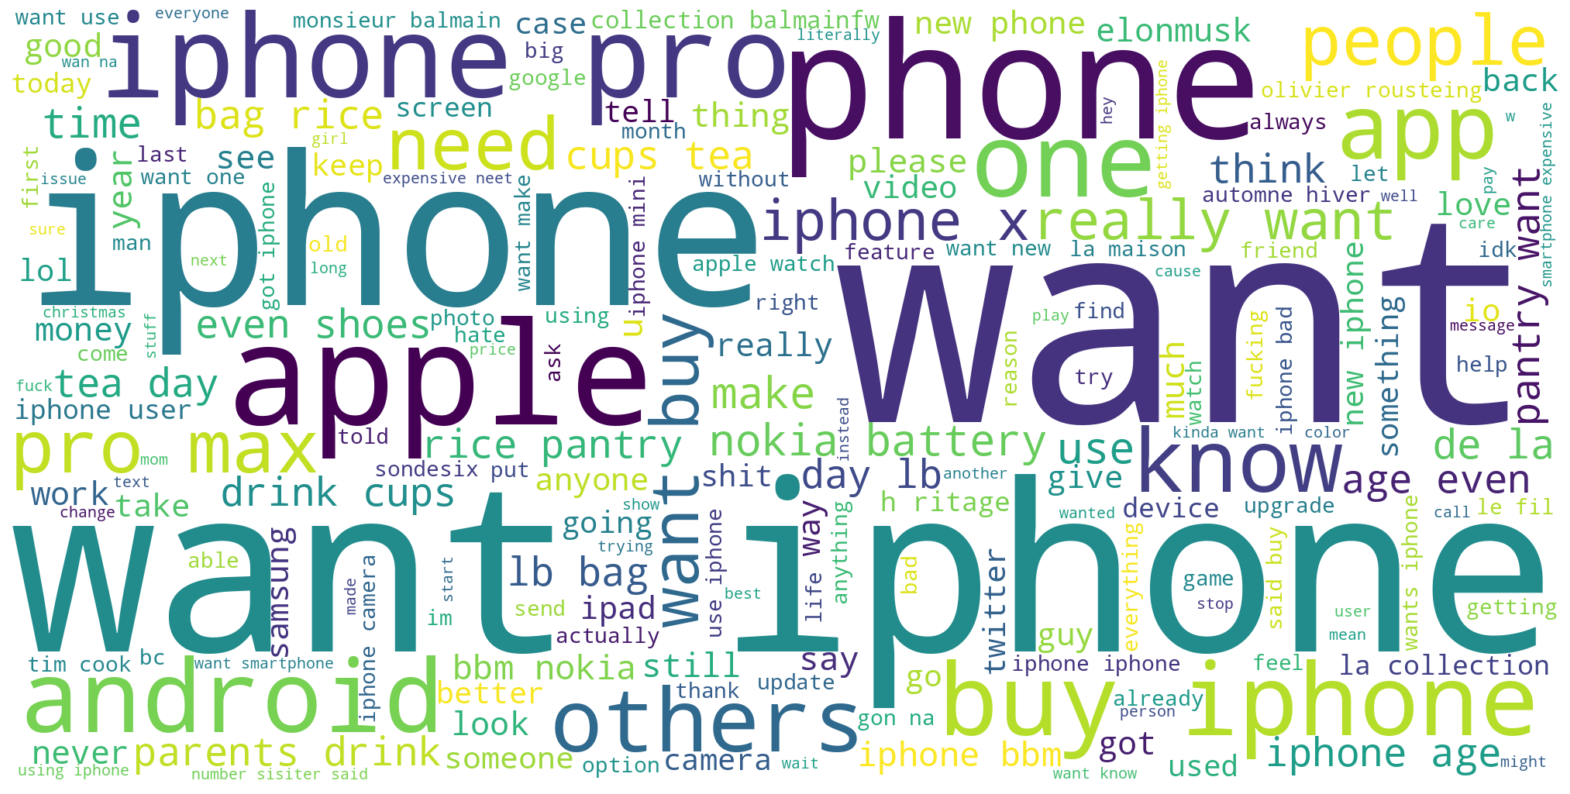

In [216]:
#Using wordcloud to visualize the comments

wordcloud = WordCloud(width = 2000, height = 1000,background_color='white').generate(unique_string)
plt.figure(figsize=(20,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('plot23.png', dpi=400, bbox_inches='tight')
plt.show()


## III- Country and continent extraction first approach

### III-1 Country extraction

Assuming that the second part of the location after the "," is the country we can extract the country and then use a predefined algorithm to get the country.

In [217]:

#extraction of the country 
def extract_country(location):
    if isinstance(location, str):
        split_loc = location.split(',')
        if len(split_loc) > 1:
            return split_loc[1].strip()
        else:
            return location.strip()
    else:
        return np.nan
Users_data['country'] = Users_data['location'].apply(extract_country)

Users_data = Users_data[Users_data['country'].notna()]
Users_data.head()

,type,dateCreated,username,givenName,description,location,follows,friends,tweets,gender,country
2,ProfilePage,2008-09-24T21:15:31.000Z,romyilano,romy@mastodon.berlin,I like to build things,"Oakland, CA",1963,3357,100203,uknown,CA
4,ProfilePage,2017-12-02T10:56:56.000Z,correctBlogger,Your Favorite Online Tech Blogger..,Creative tech story teller and blogger @ https...,Places,829,754,8612,uknown,Places
6,ProfilePage,2022-12-08T17:03:22.000Z,oLemoN_TowNo,♡☆Ellie Semi IA☆♡,Call me Ellie!\n 13-15 \n~Any pronous~\nPatc...,Ur mom™,322,358,11776,male,Ur mom™
7,ProfilePage,2011-11-09T12:09:53.000Z,nashy_93,nash,🇦🇺🇬🇧 | she/her | 21+ | ur resident onee-san / ...,Australia,95,220,8358,uknown,Australia
8,ProfilePage,2021-03-12T01:17:16.000Z,tatarsundal,wine vigilante shit,mistress of whisperers in liberated parahyanga...,she/they,1304,424,10178,male,she/they


### III-2 Continent extraction

In [218]:

def my_convert(row):
    try:
      cn_code = pc.country_name_to_country_alpha2(row.country, cn_name_format='default')
      conti_code = pc.country_alpha2_to_continent_code(cn_code)
      return conti_code
    except:
      return np.nan
Users_data['continent'] = Users_data.apply(my_convert, axis = 1)
Users_data.head()



,type,dateCreated,username,givenName,description,location,follows,friends,tweets,gender,country,continent
2,ProfilePage,2008-09-24T21:15:31.000Z,romyilano,romy@mastodon.berlin,I like to build things,"Oakland, CA",1963,3357,100203,uknown,CA,NaN
4,ProfilePage,2017-12-02T10:56:56.000Z,correctBlogger,Your Favorite Online Tech Blogger..,Creative tech story teller and blogger @ https...,Places,829,754,8612,uknown,Places,NaN
6,ProfilePage,2022-12-08T17:03:22.000Z,oLemoN_TowNo,♡☆Ellie Semi IA☆♡,Call me Ellie!\n 13-15 \n~Any pronous~\nPatc...,Ur mom™,322,358,11776,male,Ur mom™,NaN
7,ProfilePage,2011-11-09T12:09:53.000Z,nashy_93,nash,🇦🇺🇬🇧 | she/her | 21+ | ur resident onee-san / ...,Australia,95,220,8358,uknown,Australia,OC
8,ProfilePage,2021-03-12T01:17:16.000Z,tatarsundal,wine vigilante shit,mistress of whisperers in liberated parahyanga...,she/they,1304,424,10178,male,she/they,NaN


How many continent we have identified.

In [219]:
continents = Users_data.groupby('continent').size()
continents

continent
AF    459
AS    263
EU    203
NA    551
OC     48
SA     25
dtype: int64

In [220]:
Users_data.head(20)

,type,dateCreated,username,givenName,description,location,follows,friends,tweets,gender,country,continent
2,ProfilePage,2008-09-24T21:15:31.000Z,romyilano,romy@mastodon.berlin,I like to build things,"Oakland, CA",1963,3357,100203,uknown,CA,NaN
4,ProfilePage,2017-12-02T10:56:56.000Z,correctBlogger,Your Favorite Online Tech Blogger..,Creative tech story teller and blogger @ https...,Places,829,754,8612,uknown,Places,NaN
6,ProfilePage,2022-12-08T17:03:22.000Z,oLemoN_TowNo,♡☆Ellie Semi IA☆♡,Call me Ellie!\n 13-15 \n~Any pronous~\nPatc...,Ur mom™,322,358,11776,male,Ur mom™,NaN
7,ProfilePage,2011-11-09T12:09:53.000Z,nashy_93,nash,🇦🇺🇬🇧 | she/her | 21+ | ur resident onee-san / ...,Australia,95,220,8358,uknown,Australia,OC
8,ProfilePage,2021-03-12T01:17:16.000Z,tatarsundal,wine vigilante shit,mistress of whisperers in liberated parahyanga...,she/they,1304,424,10178,male,she/they,NaN
9,ProfilePage,2020-03-23T01:25:57.000Z,Delightful_DD,Nash👑,"Future Management Consultant 💡, SLU 19 🎓, ♊️ ,...",Bahamas,550,412,9259,male,Bahamas,NA
10,ProfilePage,2014-04-06T14:49:27.000Z,btmukundu,Brian T Mukundu,"Let God, Let's Go.","Harare, Zimbabwe",271,1886,1388,uknown,Zimbabwe,AF
11,ProfilePage,2009-06-06T16:17:33.000Z,DrG9,"Ella Guastavino, MD",Pediatrician,"Englewood, Fl",4,14,390,male,Fl,NaN
12,ProfilePage,2021-05-01T12:03:18.000Z,ChrisCoolFX,ChrisCoolFX 💵,|| Jesus Christ || Chelsea FC 💙 || Forex Tradi...,"Greater Accra, Ghana",730,81,8787,uknown,Ghana,AF
13,ProfilePage,2013-01-15T07:44:11.000Z,UnicornPimpcess,Shaylee🦄,🦄 Inconsistent Twitch streamer and Affiliate/W...,South Wales,379,202,10327,uknown,South Wales,NaN


In [221]:
continent_NAs = Users_data["continent"].isnull().sum()
continent_NAs

5227


continent               count
AF           :          459
AS           :          263
EU           :          203
NA           :          551
OC           :          48
SA           :          25
MaN          :          5227

In [222]:
continents["Unknown"] = continent_NAs
continents

continent
AF          459
AS          263
EU          203
NA          551
OC           48
SA           25
Unknown    5227
dtype: int64

## III-3 Plotting our results

### III-3-1 Contient

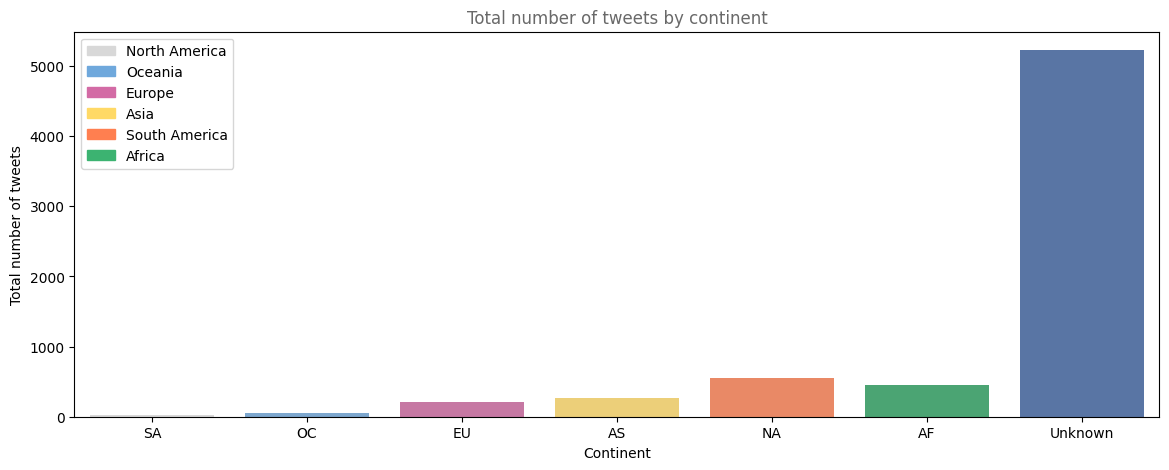

In [223]:
# Define color palette for each continent
colors = ['#d8d8d8', '#6fa8dc', '#d36ba5', '#ffd966', '#ff7f50', '#3cb371', '#4c72b0']

plt.figure(figsize=(14,5))
sns.barplot(x=['SA','OC','EU','AS','NA','AF','Unknown'], y=[continents[5],continents[4],continents[2],continents[1],continents[3],continents[0], continents[6]], palette=colors)
plt.ylabel('Total number of tweets')
plt.xlabel('Continent')
plt.title('Total number of tweets by continent', color='dimgrey')

# Create legend
legend_labels = ['North America', 'Oceania', 'Europe', 'Asia', 'South America', 'Africa']
legend_handles = [plt.Rectangle((0,0),1,1, color=colors[i]) for i in range(len(legend_labels))]
plt.legend(legend_handles, legend_labels)

plt.show()

### III-3-1 Gender

<BarContainer object of 3 artists>

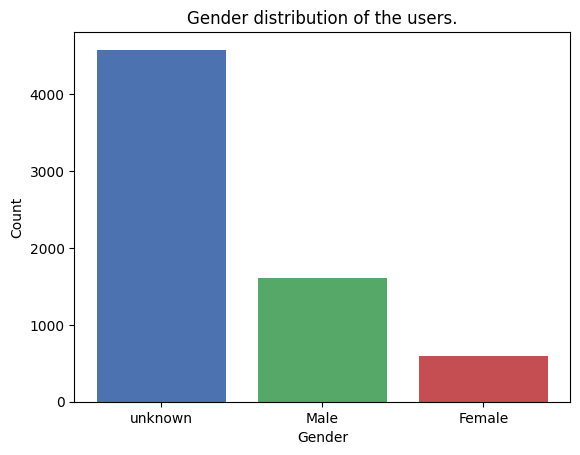

In [224]:
gender_val = Users_data.gender.value_counts()
plt.bar(['unknown', 'Male', 'Female'], gender_val)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender distribution of the users.") 
plt.bar(np.arange(3), gender_val, color=['#4c72b0', '#55a868', '#c44e52'])


## IIII- country extraction : second approach -> building an algorithm

### IIII-1 Uploading a dataset contains all the cities, states, countries and continents to map our user location to a continent

In [ ]:
city_state_country_continent = pd.read_csv('cities_countries_continents_continents.csv')


#### Look to our data

In [ ]:
Users_data2.head(20)

#### Adding a function to remove all emogies and flags from the tweets 

in further analysis maybe it'll be worth it to look into the flags mentioned in the location to get the country of the user.

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

tweet = []
for i in range(0, len(Users_data2["location"])):
    Users_data2["location"][i] = remove_emoji(str(Users_data2["location"][i]))